In [2]:
#Importing all libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np 
import pandas as pd

In [5]:
#filtering warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Importing The Dataset
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.shape

(918, 12)

In [8]:
#Creating ZScore columns to remove outliers
df['ZscoreChol'] = (df['Cholesterol'] - df['Cholesterol'].mean() )/ df['Cholesterol'].std()
df['ZscoreRestBP'] = (df['RestingBP'] - df['RestingBP'].mean() )/ df['RestingBP'].std()
df['ZscoreMaxHR'] = (df['MaxHR'] - df['MaxHR'].mean() )/ df['MaxHR'].std()

In [9]:
df[(df['ZscoreChol'] > 3) | (df['ZscoreChol'] < -3) ] 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ZscoreChol,ZscoreRestBP,ZscoreMaxHR
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1,3.018723,-0.777595,-0.267450
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1,3.695238,-0.129442,-0.463834
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0,3.338696,-0.939633,0.910853


In [10]:
df[(df['ZscoreRestBP'] > 3) | (df['ZscoreRestBP'] < -3) ] 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ZscoreChol,ZscoreRestBP,ZscoreMaxHR
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0,0.385800,3.111322,-1.210093
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1,-0.007310,3.651449,0.203871
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1,-1.817444,3.651449,0.125318
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1,-1.817444,3.651449,-2.624057
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1,-1.817444,-7.151097,0.714469
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1,0.806337,3.111322,0.518086
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1,0.815479,3.651449,-0.149620
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1,0.769768,3.219347,2.285541


In [11]:
df[(df['ZscoreMaxHR'] > 3) | (df['ZscoreMaxHR'] < -3) ] 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ZscoreChol,ZscoreRestBP,ZscoreMaxHR
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1,-1.817444,0.410685,-3.016825


In [12]:
#Keeping the datapoints which are between -3,3
df = df[(df['ZscoreChol']< 3) & (df['ZscoreChol'] > -3)]
df = df[(df['ZscoreRestBP']< 3) & (df['ZscoreRestBP'] > -3)]
df = df[(df['ZscoreMaxHR']< 3) & (df['ZscoreMaxHR'] > -3)]

In [13]:
df.shape

(906, 15)

In [14]:
#Dropping the Zscore columns
df.drop(['ZscoreChol','ZscoreRestBP','ZscoreMaxHR'],axis=1,inplace=True)

In [15]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [16]:
#Checking For NaN values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [17]:
#Printing Category of each text column
print(pd.unique(df['Sex']))
print(pd.unique(df['ChestPainType']))
print(pd.unique(df['RestingECG']))
print(pd.unique(df['ST_Slope']))
print(pd.unique(df['ExerciseAngina']))

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['Up' 'Flat' 'Down']
['N' 'Y']


In [18]:
#Creating Dummies to replace text
df = pd.get_dummies(df,drop_first=True)
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [19]:
df.sample(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
751,67,152,277,0,172,0.0,0,0,0,1,0,1,0,0,0,1
753,34,118,210,0,192,0.7,0,0,1,0,0,1,0,0,0,1
113,38,140,297,0,150,0.0,0,1,1,0,0,1,0,0,0,1
362,56,155,0,0,99,0.0,1,1,0,1,0,0,1,0,1,0
548,66,112,261,0,140,1.5,1,1,0,0,0,1,0,0,0,1


In [20]:
#Scaling all reamaining data between 0-1
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['RestingBP'] = scaler.fit_transform(df[['RestingBP']])
df['Cholesterol'] = scaler.fit_transform(df[['Cholesterol']])
df['MaxHR'] = scaler.fit_transform(df[['MaxHR']])
df['Oldpeak'] = scaler.fit_transform(df[['Oldpeak']])
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.571429,0.557915,0,0.784173,0.295455,0,1,1,0,0,1,0,0,0,1
1,0.428571,0.761905,0.347490,0,0.669065,0.409091,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.476190,0.546332,0,0.251799,0.295455,0,1,1,0,0,0,1,0,0,1
3,0.408163,0.552381,0.413127,0,0.323741,0.465909,1,0,0,0,0,1,0,1,1,0
4,0.530612,0.666667,0.376448,0,0.424460,0.295455,0,1,0,1,0,1,0,0,0,1


In [21]:
#splitting dataset to Train,Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('HeartDisease',axis=1),df['HeartDisease'],test_size=0.25,random_state=30)

In [22]:
#Storing all possible models with their parameters in a dictionary
model_params = {
     'svm' : {
     'model' : SVC(),
     'params':{
        'C':[10,15,20,40,50],
        'kernel': ['rbf','linear']
    }
},
    'random_forest':{
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators' : range(10)
        }
    },
    'logistic_regression':{
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params' : {
            'C': range(20)
        }
    },
    'GaussianNB' : {
        'model' : GaussianNB(),
        'params' : {}
    },
    'MulNB': {
        'model' : MultinomialNB(),
        'params' : {}
    },
    'DecisionTree':{
        'model' : DecisionTreeClassifier(),
        'params' :  {}
        },
    'KNN':{
        'model' : KNeighborsClassifier(),
        'params': {
            'n_neighbors' : range(10)
        }
        
    }
    
}

In [23]:
#Measuring the accuracy of each potential model
scores = []
for model,mp in model_params.items():
    cv = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    cv.fit(X_train,y_train)
    scores.append({
        'Model' : model,
        'Best Score' : cv.best_score_,
        'Best Parameters' : cv.best_params_
    })

In [24]:
#Visualizing the results
modelresults = pd.DataFrame(scores, columns=['Model','Best Score','Best Parameters'])
modelresults

,Model,Best Score,Best Parameters
0,svm,0.854248,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.836612,{'n_estimators': 8}
2,logistic_regression,0.854248,{'C': 7}
3,GaussianNB,0.849826,{}
4,MulNB,0.845403,{}
5,DecisionTree,0.758540,{}
6,KNN,0.849837,{'n_neighbors': 9}


In [25]:
#Based on prediction ,we choose SVM model and getting the results
model_svm = SVC(C=10,kernel='linear')
model_svm.fit(X_train,y_train)
model_svm.score(X_test,y_test)

0.8678414096916299

In [26]:
df.shape

(906, 16)

In [27]:
#Splitting Dataset X,y to apply PCA on X
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
X.shape

(906, 15)

In [28]:
#Creating PCA object and applying to X ,reducing the number of columns from 15 to 4 
pca = PCA(0.60)
X_pca = pca.fit_transform(X)
X_pca.shape

(906, 4)

In [29]:
#Splitting the dataset again
from sklearn.model_selection import train_test_split
X_train_pca,X_test_pca,y_train,y_test = train_test_split(X_pca,y,test_size=0.25,random_state=30)

In [30]:
#Using SVM again after the PCA transformation,noticing a minor drop accuracy,which is normal
model_svm_pca= SVC(C=10,kernel='linear')
model_svm_pca.fit(X_train_pca,y_train)
model_svm_pca.score(X_test_pca,y_test)

0.8810572687224669

In [31]:
y_pred= model_svm_pca.predict(X_test_pca)

Text(69.0, 0.5, 'Truth')

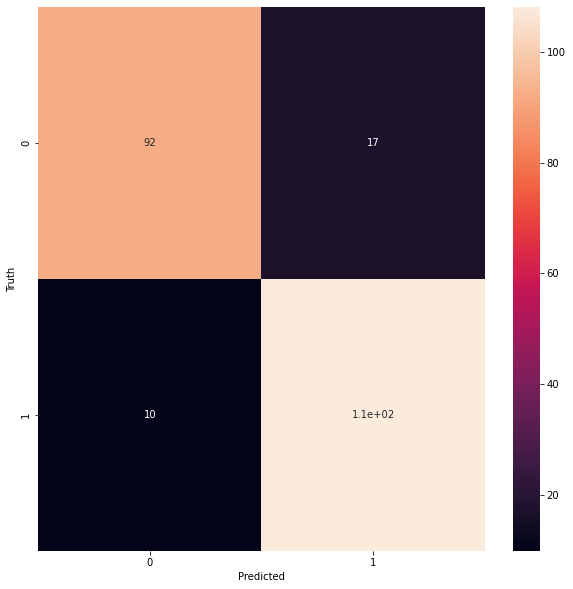

In [32]:
#Plotting the Confusion Matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
#Printing the Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       109
           1       0.86      0.92      0.89       118

    accuracy                           0.88       227
   macro avg       0.88      0.88      0.88       227
weighted avg       0.88      0.88      0.88       227

